# Import Python Libraries

In [1]:
import numpy as np
import time
import random

In [2]:
from sklearn.ensemble import RandomForestClassifier 
import sklearn.metrics as metrics

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

print( tf.__version__ )

2.8.2


# FASHION data

In [4]:
# Loan in Fashion Data
#mnist = tf.keras.datasets.fashion_mnist # 28x28 Fashion Image Data

#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
#               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]


# NUMBER data

In [5]:
#Load in Data
mnist = tf.keras.datasets.mnist # 28x28 Handwritten Digits 0-9

In [6]:


(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the Data
#x_train = tf.keras.utils.normalize( x_train, axis=1 )
#x_test = tf.keras.utils.normalize( x_test, axis=1 )

x_train = x_train / 255 
x_test = x_test / 255 



11501568/11490434 [==============================] - 0s 0us/step


In [7]:

print( type( x_train ) )
print( x_train.shape )

print( type( y_train ) )
print( y_train.shape )


<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)


In [8]:
INPUT_SHAPE = x_train[0].shape
print("Shape = ", INPUT_SHAPE )

TOTAL_SIZE = INPUT_SHAPE[0] * INPUT_SHAPE[1]
print("TOTAL SIZE = ", TOTAL_SIZE)


Shape =  (28, 28)
TOTAL SIZE =  784


In [9]:
def getRandomIndex( DATA ) :
    return random.randint(0, DATA.shape[0] )

who= 54108
0


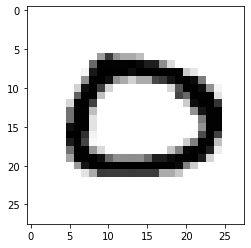

In [10]:

who=0
who=getRandomIndex( x_train )

print("who=", who)

print( y_train[who])
#print( x_train[who])
plt.imshow(x_train[who], plt.cm.binary) 
#plt.imshow(x_train[who] ) 


# SOLVE USING RANDOM FORESTS

In [11]:
new_x_train = []
for i in x_train :
    new_x_train.append( i.flatten() )
new_x_train = np.array( new_x_train )

new_x_test = []
for i in x_test :
    new_x_test.append( i.flatten() )
new_x_test = np.array( new_x_test )

print( x_train.shape )
print( new_x_train.shape )

(60000, 28, 28)
(60000, 784)


In [12]:

start_time = time.time()

theTrees = int( 2*TOTAL_SIZE )

clf = RandomForestClassifier( n_estimators = theTrees )
clf.fit( new_x_train, y_train )

print("Execution Time = ", (time.time()-start_time) )


Execution Time =  743.0085361003876


In [13]:
pred_train = clf.predict( new_x_train )
print( pred_train[0] )
RF_acc_train = metrics.accuracy_score(y_train, pred_train )
print( "train accuracy", RF_acc_train )

pred_test = clf.predict( new_x_test )
print( pred_test[0] )
RF_acc = metrics.accuracy_score(y_test, pred_test )
print( "test accuracy", RF_acc )


5
train accuracy 1.0
7
test accuracy 0.9721


# SOLVE USING TENSOR FLOW NEURAL NETWORKS

In [14]:
theEpochs = 2

theActivation = tf.keras.activations.relu


units_01 = int( 2*TOTAL_SIZE )
units_02 = units_01

DENSE_LAYER_01 = tf.keras.layers.Dense( units=units_01, activation=theActivation )
DENSE_LAYER_02 = tf.keras.layers.Dense( units=units_02, activation=theActivation )
DENSE_LAYER_XX = tf.keras.layers.Dense(10, activation=tf.nn.softmax )

DROPOUT_LAYER = tf.keras.layers.Dropout( 0.2 )


theOptimizer = tf.keras.optimizers.Adam()
theLossMetric = tf.keras.losses.SparseCategoricalCrossentropy()

theSplit = 0.2
theBatchSize = 32
verboseFlag = True

theTensorFlowSaveFile = "TF_Number_Model"

In [15]:

# Build the Model

start_time = time.time()

model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Flatten( input_shape=INPUT_SHAPE ) )
model.add( DENSE_LAYER_01 )
model.add( DROPOUT_LAYER )
model.add( DENSE_LAYER_02 )
model.add( DENSE_LAYER_XX )
#model.compile( optimizer=theOptimizer, loss=theLossMetric )
model.compile( optimizer=theOptimizer, loss=theLossMetric, metrics=['accuracy'] )
#model.fit(x_train, y_train, epochs=theEpochs, verbose = verboseFlag )
model.fit(x_train, y_train, epochs=theEpochs, validation_split=theSplit, batch_size=theBatchSize, verbose = verboseFlag )


print("Execution Time = ", (time.time()-start_time) )




Epoch 1/2
1500/1500 [==============================] - 53s 35ms/step - loss: 0.2148 - accuracy: 0.9345 - val_loss: 0.1181 - val_accuracy: 0.9653
Epoch 2/2
1500/1500 [==============================] - 53s 35ms/step - loss: 0.1088 - accuracy: 0.9670 - val_loss: 0.1118 - val_accuracy: 0.9678
Execution Time =  106.1865451335907


In [18]:
probs = model.predict( x_test )

pred_list = []
for p in probs :
    pred_list.append( np.argmax( p ) )
pred = np.array( pred_list )
acc_score = metrics.accuracy_score( y_test, pred)

for i in range(5) :
    who = getRandomIndex( x_test )
    print("WHO = ", who, " Predicte =", pred[who], " Actual = ", y_test[who] )

print(" --------- ")
print("accuracy = ", acc_score)


WHO =  2059  Predicte = 7  Actual =  7
WHO =  200  Predicte = 3  Actual =  3
WHO =  7511  Predicte = 5  Actual =  5
WHO =  7648  Predicte = 7  Actual =  7
WHO =  4822  Predicte = 8  Actual =  8
 --------- 
accuracy =  0.9696


In [19]:
NN_loss, NN_acc = model.evaluate( x_test, y_test )
print("loss=",NN_loss)
print("accuracy",NN_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0987 - accuracy: 0.9696
loss= 0.09870584309101105
accuracy 0.9696000218391418


In [20]:
model.save( theTensorFlowSaveFile )

INFO:tensorflow:Assets written to: TF_Number_Model/assets


In [21]:
new_model= tf.keras.models.load_model( theTensorFlowSaveFile )

In [22]:
predictions = new_model.predict( x_test ) 

[3.1172005e-09 3.1573145e-06 9.9998653e-01 5.3248851e-07 3.9957239e-12
 9.4463319e-11 3.5080567e-11 8.7599446e-06 1.0265276e-06 5.2220259e-11]
predict= 2 actual= 2


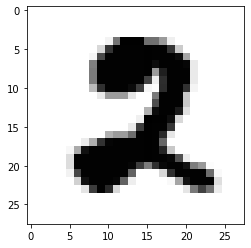

In [23]:
who=getRandomIndex( x_test )
print( predictions[who]) # probability score
result = np.argmax( list(predictions[who]) )
print("predict=",result,"actual=",y_test[who])
plt.imshow( x_test[who], plt.cm.binary )
#plt.show()

# Accuracy of RANDOM FOREST and NEURAL NETWORK

In [24]:
print("RF accuracy", RF_acc )
print("NN accuracy",NN_acc)

RF accuracy 0.9721
NN accuracy 0.9696000218391418
